<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### Load the csv file

In [26]:
b=pd.read_csv('bank.csv')
b.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

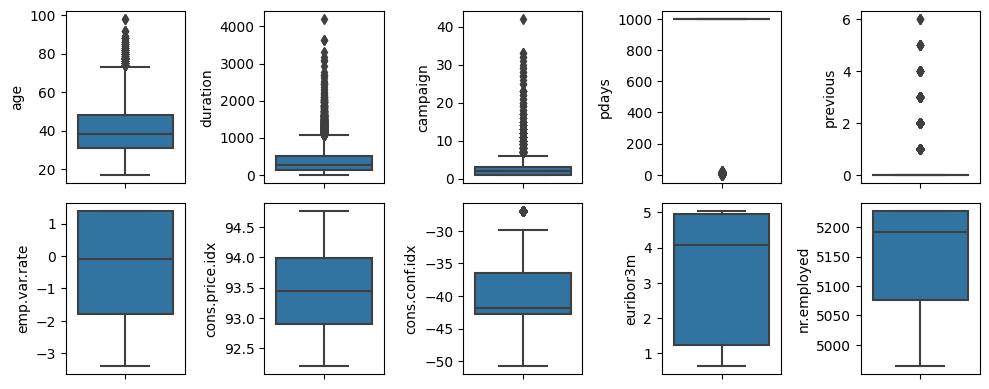

In [27]:
n=1
plt.figure(figsize=(10,4))
for i in b.drop('y',axis=1):
    plt.subplot(2,5,n)
    sns.boxplot(y=b[i])
    n+=1
plt.tight_layout()
plt.show()

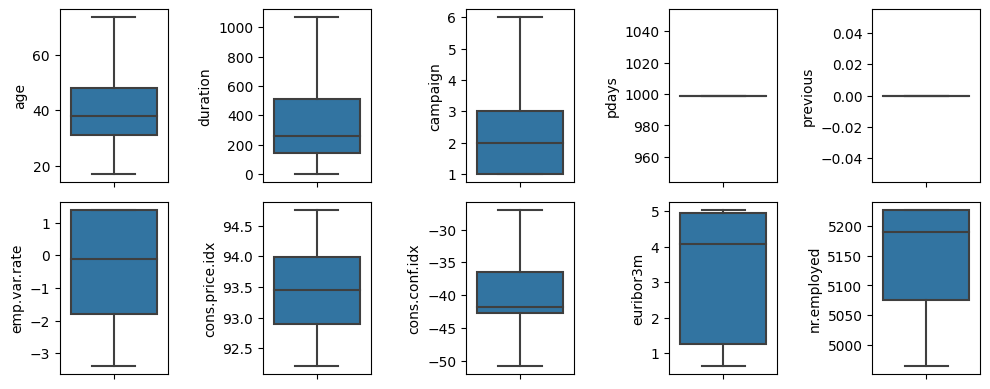

In [28]:
n=1
plt.figure(figsize=(10,4))
for i in b.drop('y',axis=1):
    q1=b[i].quantile(.25)
    q3=b[i].quantile(.75)
    iqr=q3-q1
    b[i]=np.where(b[i]>q3+1.5*iqr,q3+1.5*iqr,b[i])
    b[i]=np.where(b[i]<q1-1.5*iqr,q1-1.5*iqr,b[i])
    plt.subplot(2,5,n)
    sns.boxplot(y=b[i])
    n+=1
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
x=b.drop('y',axis=1)
y=b.y
print(x.shape,y.shape)

(9640, 10) (9640,)


In [30]:
b.y=b.y.map({'no':0,'yes':1})
b.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.0,205.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.858,5191.0,0
1,32.0,691.0,6.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,1
2,45.0,45.0,6.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,0
3,33.0,400.0,1.0,999.0,0.0,-1.1,94.601,-49.5,1.032,4963.6,1
4,47.0,903.0,2.0,999.0,0.0,-1.8,93.075,-47.1,1.415,5099.1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
b=b.replace('unknown',np.nan)
b.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.0,205.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.858,5191.0,0
1,32.0,691.0,6.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,1
2,45.0,45.0,6.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,0
3,33.0,400.0,1.0,999.0,0.0,-1.1,94.601,-49.5,1.032,4963.6,1
4,47.0,903.0,2.0,999.0,0.0,-1.8,93.075,-47.1,1.415,5099.1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
b.isna().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
b.nunique()

age                 58
duration          1033
campaign             6
pdays                1
previous             1
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          296
nr.employed         11
y                    2
dtype: int64

In [34]:
b=b.drop(['pdays','previous'],axis=1)
b.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.0,205.0,2.0,1.1,93.994,-36.4,4.858,5191.0,0
1,32.0,691.0,6.0,1.4,93.918,-42.7,4.960,5228.1,1
2,45.0,45.0,6.0,1.4,93.444,-36.1,4.963,5228.1,0
3,33.0,400.0,1.0,-1.1,94.601,-49.5,1.032,4963.6,1
4,47.0,903.0,2.0,-1.8,93.075,-47.1,1.415,5099.1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

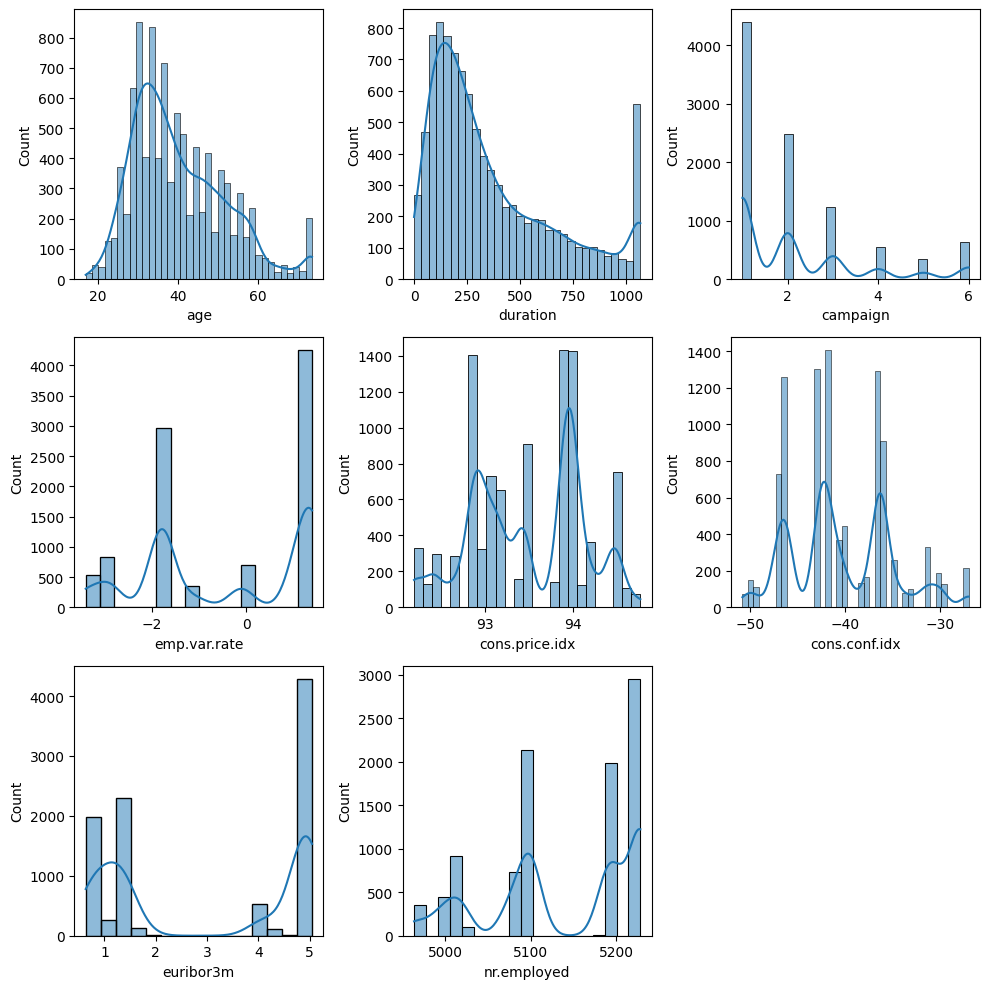

In [47]:
n=1
plt.figure(figsize=(10,10))
for i in b.drop('y',axis=1):
    plt.subplot(3,3,n)
    sns.histplot(x=b[i],kde=True)
    n+=1
plt.tight_layout()
plt.show()

In [48]:
pd.DataFrame({'Skewness':[b[i].skew() for i in b.drop('y',axis=1)]},[b.drop('y',axis=1)])

,Skewness
age,0.788079
duration,1.089882
campaign,1.356104
emp.var.rate,-0.181234
cons.price.idx,-0.125216
cons.conf.idx,0.347668
euribor3m,-0.058332
nr.employed,-0.463581


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

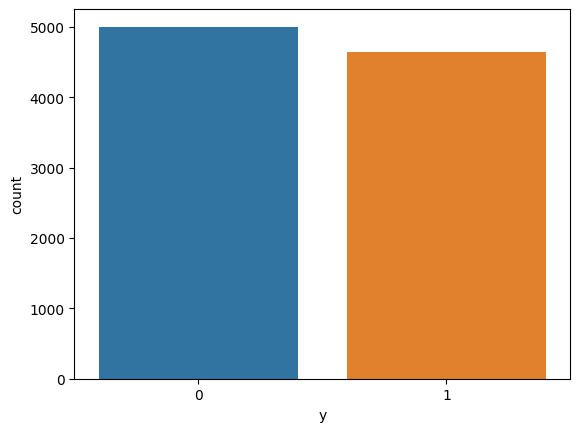

In [49]:
sns.countplot(x=b.y)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
b.iloc[:,:-1]=pd.DataFrame(StandardScaler().fit_transform(b.iloc[:,:-1]),
                           columns=b.iloc[:,:-1].columns)
b.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.708994,-0.535724,-0.103273,0.908285,0.805042,0.726821,0.983194,0.620697,0
1,-0.708994,1.132922,2.626141,1.082931,0.684662,-0.457451,1.037275,1.050379,1
2,0.418859,-1.085073,2.626141,1.082931,-0.066130,0.783215,1.038865,1.050379,0
3,-0.622236,0.133794,-0.785627,-0.372451,1.766500,-1.735713,-1.045350,-2.012985,1
4,0.592375,1.860809,-0.103273,-0.779958,-0.650607,-1.284561,-0.842284,-0.443662,1


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [51]:
x=b.drop('y',axis=1)
y=b.y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(6748, 8) (2892, 8) (6748,) (2892,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [52]:
def plot_CM(m,x,y):
    p=m.predict(x)
    sns.heatmap(confusion_matrix(y,p),annot=True,fmt='',cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Define a function to plot the ROC curve.

In [53]:
def plot_ROC(m,x,y):
    pp=m.predict_proba(x)[:,1]
    fpr,tpr=roc_curve(y,pp)[:2]
    a=round(roc_auc_score(y,pp),2)
    plt.plot(fpr,tpr)
    plt.plot([0,1],'r--')
    plt.text(.05,.95,'AUC = '+str(a))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
k=KNeighborsClassifier(3,metric='euclidean').fit(xtrain,ytrain)
p=k.predict(xtest)
accuracy_score(ytest,p)

0.8575380359612724

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

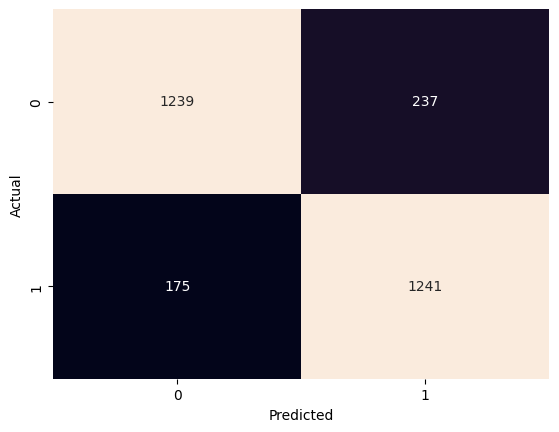

Classification report:

               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1476
           1       0.84      0.88      0.86      1416

    accuracy                           0.86      2892
   macro avg       0.86      0.86      0.86      2892
weighted avg       0.86      0.86      0.86      2892



In [55]:
plot_CM(k,xtest,ytest)
print('Classification report:\n\n',classification_report(ytest,p))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [56]:
x=b.drop('y',axis=1)
y=b.y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
pg={'n_neighbors':np.arange(1, 25, 2),'metric':['hamming','euclidean','manhattan','chebyshev']}
g=GridSearchCV(KNeighborsClassifier(),pg,cv=3).fit(xtrain,ytrain)

In [57]:
print("Optimal 'k' value =",g.best_params_['n_neighbors'])

Optimal 'k' value = 13


In [58]:
g.best_params_

{'metric': 'manhattan', 'n_neighbors': 13}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
x=b.drop('y',axis=1)
y=b.y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
k_13=KNeighborsClassifier(13,metric='manhattan').fit(xtrain,ytrain)
p=k_13.predict(xtest)
print('Accuracy =',accuracy_score(ytest,p))
print('\nClassification report:\n\n',classification_report(ytest,p))

Accuracy = 0.867911479944675

Classification report:

               precision    recall  f1-score   support

           0       0.90      0.83      0.87      1476
           1       0.84      0.90      0.87      1416

    accuracy                           0.87      2892
   macro avg       0.87      0.87      0.87      2892
weighted avg       0.87      0.87      0.87      2892



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

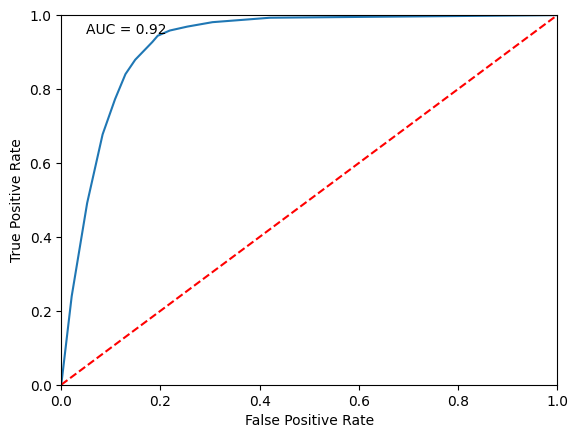

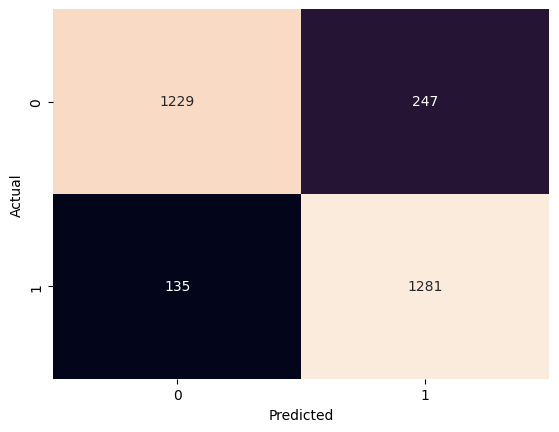

In [61]:
plot_ROC(k_13,xtest,ytest)
plot_CM(k_13,xtest,ytest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
ac=accuracy_score(ytest,p)
print('Percentage of misclassified observations =',round((1-ac)*100,2))
print('Percentage of correctly classified observations =',round(ac*100,2))

Percentage of misclassified observations = 13.21
Percentage of correctly classified observations = 86.79


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
x=b.drop('y',axis=1)
y=b.y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
accuracy=[]
for i in range(1,25,2):
    k=KNeighborsClassifier(i,metric='euclidean').fit(xtrain,ytrain)
    p=k.predict(xtest)
    accuracy.append(accuracy_score(ytest,p))
accuracy

[0.826417704011065,
 0.8575380359612724,
 0.8647994467496543,
 0.8665283540802213,
 0.8672199170124482,
 0.8634163208852006,
 0.8651452282157677,
 0.8654910096818811,
 0.8686030428769018,
 0.8682572614107884,
 0.8661825726141079,
 0.8668741355463347]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

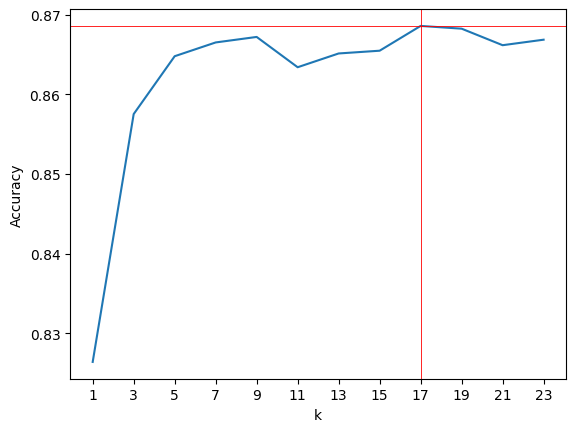

In [77]:
plt.plot(np.arange(1, 25, 2),accuracy)
plt.axhline(max(accuracy),color='r',linewidth=.6)
plt.axvline(17,color='r',linewidth=.6)
plt.xticks(np.arange(1, 25, 2))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# We can observe that the accuracy of the model is maximum for k = 17 and thus, that is the optimal
# value of k for the model.

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
x=b.drop('y',axis=1)
y=b.y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
nb_18=GaussianNB().fit(xtrain,ytrain)
p=nb_18.predict(xtest)
print(classification_report(ytest,p))

# We can observe that the overall accuracy of the model is 0.79. Thus, the model is performing fairly
# well.

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1476
           1       0.74      0.87      0.80      1416

    accuracy                           0.79      2892
   macro avg       0.79      0.79      0.79      2892
weighted avg       0.79      0.79      0.78      2892



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

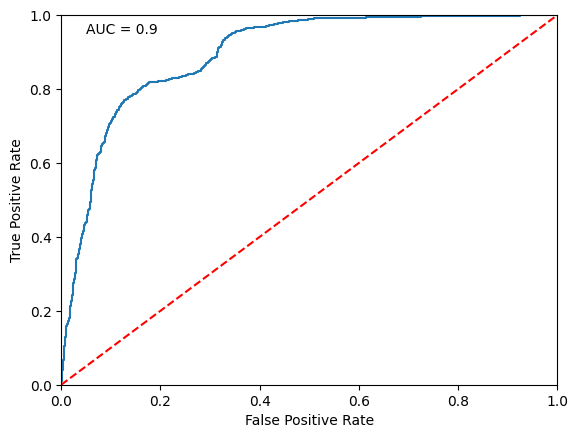

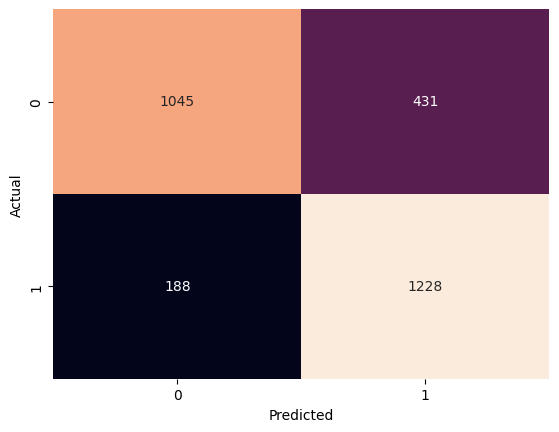

In [79]:
plot_ROC(nb_18,xtest,ytest)
plot_CM(nb_18,xtest,ytest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
x=b.drop('y',axis=1)
y=b.y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
c=cross_val_score(GaussianNB(),xtrain,ytrain,scoring='accuracy',cv=10)
print(c.mean())

0.7900153863061874
